In [1]:
import numpy as np
from matplotlib import pyplot as plt
from time import time
from math import factorial as fact
π = np.pi
tol = 1e-14

In [2]:
plt.rcParams["figure.dpi"] = 300

## Probability of Receiving a Packet

In [3]:
def f(func,C) :
    '''
    If C = UΣU.T, then f(C) = Uf(Σ)U.T = U*diag(func(σ_1),...,func(σ_2))*U.T
    
    Inputs :
        func - Callable scalar function
        C    - Cross Spectral Matrix of a system
        
    Output :
        f(C) as defined in description
    '''
    eigv, U = np.linalg.eig(C)
    eigv = [eig if abs(eig) > tol else 0 for eig in eigv]
    f_eigs = [func(eig) for eig in eigv]
    return U@np.diag(f_eigs)@U.T

def calc_coeffs(θ,N,r,λ) :
    '''
    Calculates the coefficients of the beam equation
    
    Inputs:
        θ (rad) - angle off from orthogonal to array
        N (int) - number of antenna +1
    
    Output:
        a_k for the beam form equation Σ_1^N <a_k(θ), x_k> where x_k is the volatge response of antenna k
        NOTE: This vector is normalized (why? I don't know)
    '''
    ϕ = -π*np.sin(θ) # Why is this negative?
    bs = np.zeros(N)
    for k in range(N) :
        #ϕ = 2*π*dist(k,θ,r,N,λ)/λ 
        bs[k] = np.exp(ϕ*k*1j)
    return bs/np.linalg.norm(bs)

In [9]:
# Trying to use the information in http://www.bebec.eu/Downloads/BeBeC2014/Papers/BeBeC-2014-01.pdf
N = 7                                                                  # Number of antenna
ν = 3                                                                  # ν in the functional beamforming algorithm
λ = 1                                                                  # Wavelength
num_points = 1000
practically_zero_dB = 0.5
θ = np.linspace(0,2*π,num_points)
beams = [5*π/7]                                                        # Desired azmith angles
s_k = [50]                                                             # Powers for different angles
ak = [calc_coeffs(beams[i],N,s_k[i],λ) for i in range(len(beams))]
g_k = [np.array(ak[i]).reshape(1,N) for i in range(len(ak))]
C = sum([s_k[i]*(np.dot(g_k[i].T,g_k[i])) for i in range(len(s_k))])   # Cross Spectral Matrix
func = lambda x : x**(1/ν)
b1 = lambda g : g.T@C@g
b2 = lambda g : (g.T@f(func,C)@g)**ν
sig_beam = [b2(calc_coeffs(angle,N,s_k,λ)) for angle in θ]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: ComplexWarning: Casting complex values to real discards the imaginary part


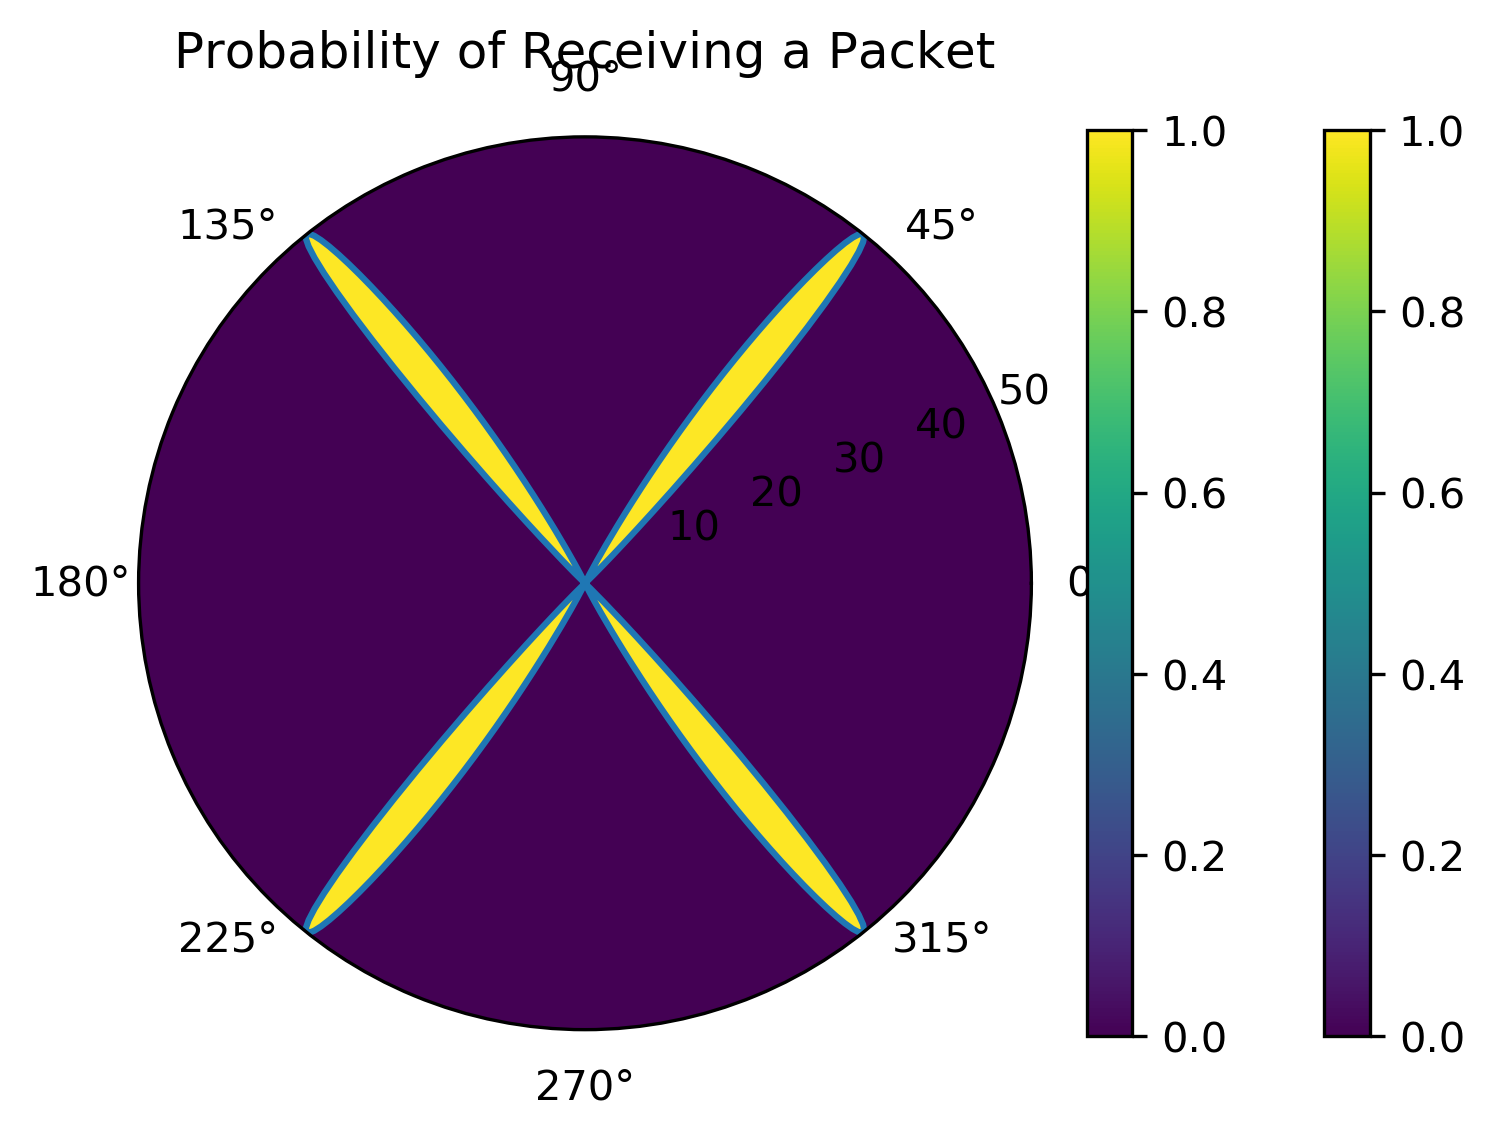

In [10]:
r = np.linspace(0,50,num_points)
R,Θ = np.meshgrid(r,θ)
Z = np.zeros_like(Θ)
for j in range(len(θ)) :
    sig_str = sig_beam[j]
    # This line here is what will need to change when I actually have a probability for things.
    if R[j,:] < sig_str :
        Z[j,:] = 1
    else :
        Z[j,:] = 0
plt.polar(θ,sig_beam)
plt.pcolor(Θ,R,Z)
plt.colorbar()
plt.title('Probability of Receiving a Packet')
plt.colorbar()
plt.show()